In [7]:
#Note for psplt.plot_complex_density_matrix() to properly plot you will need to comment out the following from pulsee.plot source code: 
#idx, = np.where(abs(dm_data) < 0.001)
#dm_data[idx] = abs(dm_data[idx])

In [8]:
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op # "import *" is bad Python practice, but simplest way to do some math
from sympy import symbols, Matrix, nsimplify


# import pulsee.simulation as sim
from plot_dm import plot_complex_density_matrix

import tomography_helper_functions
import tomography_helper_functions as helper
# from tomography.tomography_helper_functions import projection_fortunato, plot_spectra_together
# from tomography.tomography_helper_functions import index_to_element, integrate_simpson, integrate_optimized

# import * is bad practice, but this is the easiest way to do quick theoretical calculations with this many variables.
import operators as op
import global_constants as glob
from coeff_groups_class import CoefficientGroups

from temporal_average import temporal_average

# Calculating thermal state density matrix

In [9]:
# Define symbolic constants
hbar, w1, w2, k_b, T, = symbols('hbar w1 w2 k_b T')

# Extract the numerical matrix from the Qobj as a NumPy array
op.Iz_numpy = op.Iz.full()
op.Sz_numpy = op.Sz.full()
op.identity_numpy = op.IDENTITY.full()
# Convert the NumPy array to a SymPy Matrix
op.Iz_sympy = Matrix(op.Iz_numpy)
op.Sz_sympy = Matrix(op.Sz_numpy)
op.identity_sympy = Matrix(op.identity_numpy)

thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
#spin dynamics pg 391
#thermal_state = thermal_state.applyfunc(Rational)
display(thermal_density_matrix_simple)
#qutip_matrix = Qobj(numerical_matrix)   # Create the Qobj from the numerical matrix

# Display the Qobj matrix
#print("The resulting Qobj matrix is:")
#print(qutip_matrix)

Matrix([
[1/4 + hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                           0,                                           0,                                           0],
[                                          0, 1/4 + hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b),                                           0,                                           0],
[                                          0,                                           0, 1/4 - hbar*w1/(8*T*k_b) + hbar*w2/(8*T*k_b),                                           0],
[                                          0,                                           0,                                           0, 1/4 - hbar*w1/(8*T*k_b) - hbar*w2/(8*T*k_b)]])

In [10]:
hbar = 1.054571817*10**-34 #J*s
w1 = 202.4751925*10**6 #s^-1
w2 = 202.4744409.4744409*10**6 #s^-1
k_b = 1.380649*10**-23 #J*K^−1
T = 310.15 #K
thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
display(thermal_density_matrix_simple)

# Convert SymPy matrix to NumPy array
numpy_matrix = np.array(thermal_density_matrix).astype(np.complex128)
# Convert NumPy array to Qobj
thermal_density_matrix_Qobj= qt.Qobj(numpy_matrix, dims=[[2, 2], [2, 2]])
plot_complex_density_matrix(thermal_density_matrix_Qobj)

SyntaxError: invalid syntax (3709673861.py, line 3)

# Calculating thermal state deviation density matrix

In [ ]:
hbar, w1, w2, k_b, T, = symbols('hbar w1 w2 k_b T')
thermal_density_matrix =(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
thermal_deviation_density_matrix = thermal_density_matrix_simple - op.identity_sympy/4
display(thermal_deviation_density_matrix)

In [ ]:
hbar = 1.054571817*10**-34 #J*s
w1 = 242.9516595*10**6 #s^-1
w2 = 242.9507284*10**6 #s^-1
k_b = 1.380649*10**-23 #J*K^−1
T = 310.15 #K
thermal_density_matrix=(1/4)*op.identity_sympy+(1/4)*op.Iz_sympy*(hbar*w1/(k_b*T))+(1/4)*op.Sz_sympy*(hbar*w2/(k_b*T))
thermal_density_matrix_simple = thermal_density_matrix.applyfunc(nsimplify)
thermal_deviation_density_matrix = thermal_density_matrix_simple - op.identity_sympy/4
display(thermal_deviation_density_matrix)

# Convert SymPy matrix to NumPy array
numpy_matrix = np.array(thermal_deviation_density_matrix).astype(np.complex128)
# Convert NumPy array to Qobj
thermal_deviation_density_matrix_Qobj= qt.Qobj(numpy_matrix, dims=[[2, 2], [2, 2]])
plot_complex_density_matrix(thermal_deviation_density_matrix_Qobj, zlim=(0,5*10**(-6)), show=True)
#There seems to be an psplt.plot_complex_density_matrix() error here as the second term should be red!
#psplt.plot_complex_density_matrix(op.Iz + op.Sz)
#display(op.Iz + op.Sz)
#display(thermal_deviation_density_matrix)

In [11]:
(hbar*w1/(k_b*T))

hbar*w1/(T*k_b)

# Pure Density Matrix

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DejaVu Sans Mono'] not found. Falling back to DejaVu Sans.


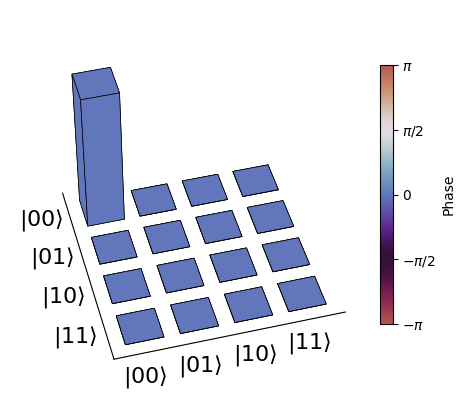

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [12]:
rho_1000 = qt.Qobj([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],  [0, 0, 0, 0]], dims=[[2, 2], [2, 2]])
display(rho_1000)
plot_complex_density_matrix(rho_1000)
print(rho_1000)

# Pseudo-Pure Density Matrix

In [13]:
c=1/12*(hbar*w1/(k_b*T)) #see thesis for calculation of this term
rho_1000_pseudo_pure_temporal = (1/4-c)*op.IDENTITY+4*c*qt.Qobj([[1, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0],  [0, 0, 0, 0]], dims=[[2, 2], [2, 2]])
display(rho_1000_pseudo_pure_temporal)
psplt.plot_complex_density_matrix(rho_1000_pseudo_pure_temporal)
print(rho_1000_pseudo_pure_temporal)

TypeError: unsupported operand type(s) for *: 'Add' and 'Qobj'

In [17]:
hbar = 1.054571817*10**-34 #J*s
w1 = 202.4751925*10**6 #s^-1
w2 = 202.4744409*10**6 #s^-1
k_b = 1.380649*10**-23 #J*K^−1
T = 310.15 #K
n=2

hbar*w1/(2**n*k_b*T)

1.2466166463846568e-06

In [24]:
n=12
1/(1+2**(2*n-1))

1.1920927533992823e-07

In [35]:
n=28
n/(2**(n))

1.043081283569336e-07